In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Loan Status Prediction.csv')

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [ ]:
data.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
260,LP002314,Female,No,0,Not Graduate,No,2213,0.0,66.0,360.0,1.0,Rural,Y
21,LP001095,Male,No,0,Graduate,No,3167,0.0,74.0,360.0,1.0,Urban,N
361,LP002872,NaN,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,N
237,LP002224,Male,No,0,Graduate,No,3069,0.0,71.0,480.0,1.0,Urban,N
159,LP001849,Male,No,0,Not Graduate,No,6045,0.0,115.0,360.0,0.0,Rural,N


In [ ]:
data.shape

(381, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,5
Married,0
Dependents,8
Education,0
Self_Employed,21
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,11


In [ ]:
def null_value_treatment(data,col):
  if data[col].dtypes == 'object':
    data[col].fillna(data[col].mode()[0], inplace=True)
  else:
    data[col].fillna(data[col].median(), inplace=True)
  return data

In [ ]:
for i in data:
  null_value_treatment(data,i)

<ipython-input-9-3b70624da40a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
<ipython-input-9-3b70624da40a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


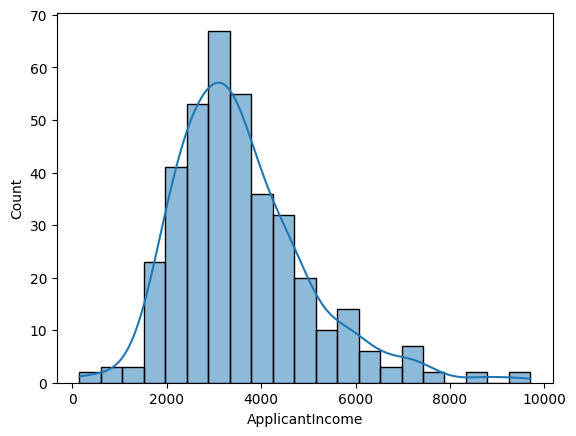

In [ ]:
for i in data.select_dtypes('int','float'):
  sns.histplot(data=data,x=i,kde=True)
  plt.show()

In [ ]:
data.skew(numeric_only=True)

,0
ApplicantIncome,1.119751
CoapplicantIncome,8.660692
LoanAmount,-0.804282
Loan_Amount_Term,-2.253633
Credit_History,-1.972497


In [ ]:
data.skew(numeric_only=True).index

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [ ]:
data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']]=pt.fit_transform(data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']])

In [ ]:
data.skew(numeric_only=True)

,0
ApplicantIncome,0.129511
CoapplicantIncome,-0.105224
LoanAmount,-0.226333
Loan_Amount_Term,0.288260
Credit_History,-1.972497


In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,0.778888,0.838278,0.843727,0.173703,0.419435,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,-0.328035,-1.073517,-1.388853,0.173703,0.419435,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,-0.671387,0.975551,0.485201,0.173703,0.419435,Urban,Y
3,LP001008,Male,No,0,Graduate,No,1.600183,-1.073517,1.469804,0.173703,0.419435,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,-0.892106,0.839887,-0.502026,0.173703,0.419435,Urban,Y


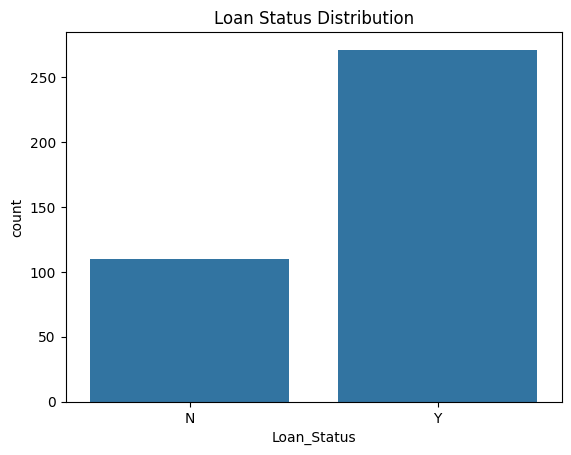

In [ ]:
sns.countplot(x='Loan_Status', data=data)
plt.title('Loan Status Distribution')
plt.show()

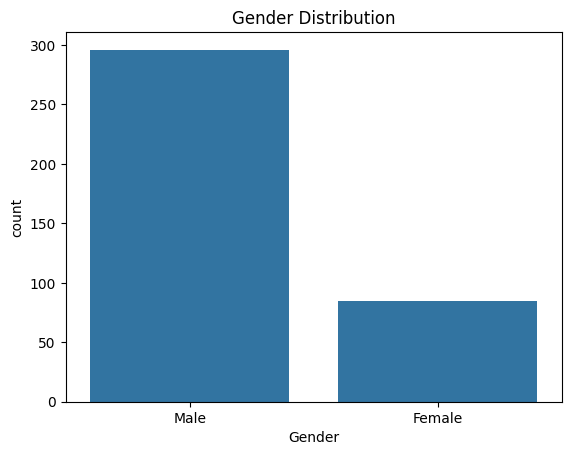

In [ ]:
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


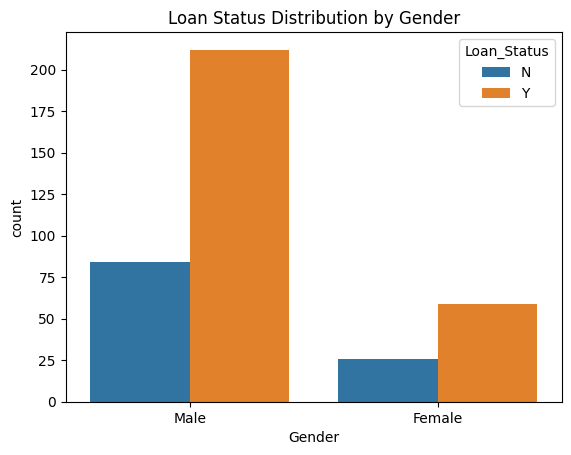

In [ ]:
sns.countplot(x='Gender', hue='Loan_Status', data=data)
plt.title('Loan Status Distribution by Gender')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


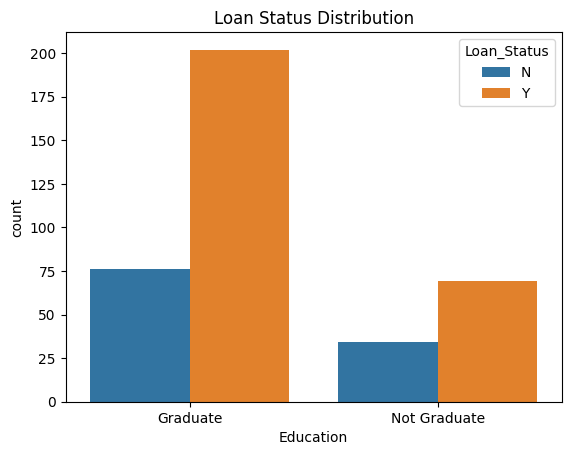

In [ ]:
sns.countplot(x='Education', hue='Loan_Status', data=data)
plt.title('Loan Status Distribution')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


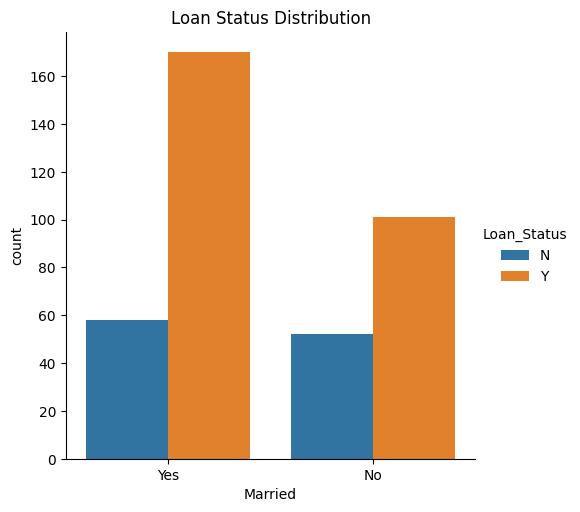

In [ ]:
sns.catplot(x='Married', hue='Loan_Status', kind='count', data=data)
plt.title('Loan Status Distribution')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


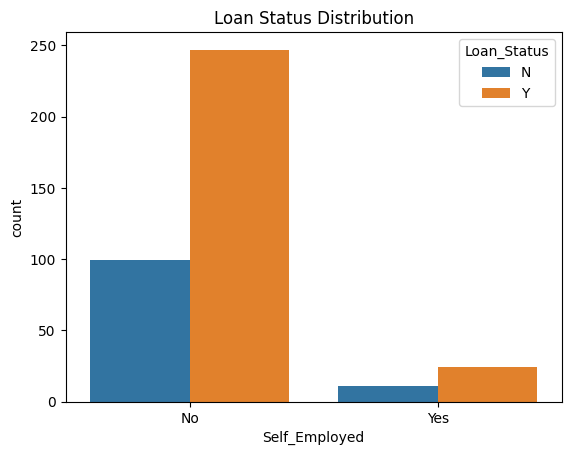

In [ ]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data=data)
plt.title('Loan Status Distribution')
plt.show()

In [ ]:
data['Credit_History'].unique()

array([ 0.41943525, -2.38415824])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


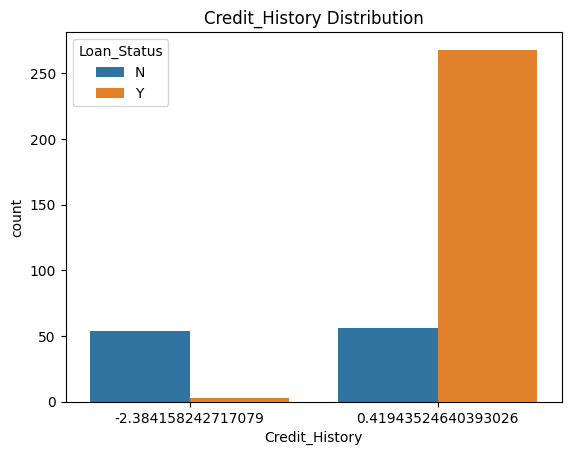

In [ ]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=data)
plt.title('Credit_History Distribution')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

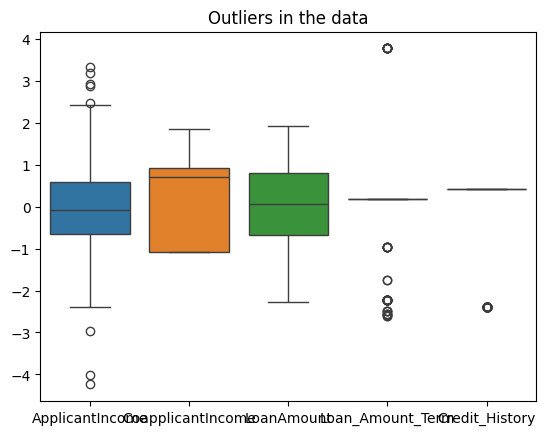

In [ ]:
sns.boxplot(data)
plt.title('Outliers in the data')
plt.show()

In [ ]:
def find_outliers_iqr(data, column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
  return outliers


In [ ]:
for column in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
        outliers = find_outliers_iqr(data, column)
        print(f"Outliers in {column}:")
        print(outliers) # Print to review or debug

Outliers in ApplicantIncome:
      Loan_ID  Gender Married Dependents     Education Self_Employed  \
99   LP001572    Male     Yes          0      Graduate            No   
132  LP001722    Male     Yes          0      Graduate            No   
153  LP001814    Male     Yes          2      Graduate            No   
235  LP002219    Male     Yes         3+      Graduate            No   
275  LP002377  Female      No          1      Graduate           Yes   
294  LP002484    Male     Yes         3+      Graduate            No   
299  LP002502  Female     Yes          2  Not Graduate            No   
317  LP002603  Female      No          0      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
99          3.177115          -1.073517   -1.143869         -2.225013   
132        -4.236169           0.892313    1.174185          0.173703   
153         3.336061          -1.073517    0.147226          0.173703   
235         2.930528          

In [ ]:
for column in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
            data = data[~data.index.isin(find_outliers_iqr(data, column).index)]

In [ ]:
for column in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
            outliers = find_outliers_iqr(data, column)
            data.loc[outliers.index, column] = np.nan # Assign NaN to outliers
            null_value_treatment(data,column) # Fill NaN with median

<ipython-input-9-3b70624da40a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
<ipython-input-9-3b70624da40a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

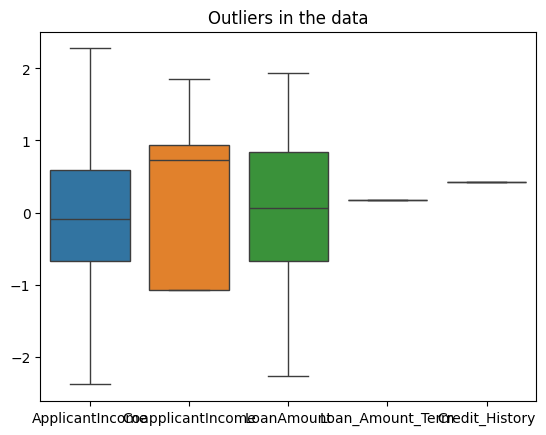

In [ ]:
sns.boxplot(data)
plt.title('Outliers in the data')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [ ]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for column in categorical_columns:
    data[column] = le.fit_transform(data[column])

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,0,0,0.778888,0.838278,0.843727,0.173703,0.419435,0,0
1,LP001005,1,1,0,0,1,-0.328035,-1.073517,-1.388853,0.173703,0.419435,2,1
2,LP001006,1,1,0,1,0,-0.671387,0.975551,0.485201,0.173703,0.419435,2,1
3,LP001008,1,0,0,0,0,1.600183,-1.073517,1.469804,0.173703,0.419435,2,1
4,LP001013,1,1,0,1,0,-0.892106,0.839887,-0.502026,0.173703,0.419435,2,1


In [ ]:
data.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
363,LP002877,1,1,1,0,0,-1.429907,0.958544,-0.053506,0.173703,0.419435,0,1
209,LP002087,0,0,0,0,0,-0.743304,-1.073517,-1.362994,0.173703,0.419435,2,1
261,LP002318,0,0,1,1,1,0.309742,-1.073517,-1.488862,0.173703,0.419435,1,0
245,LP002250,1,1,0,0,0,1.317213,-1.073517,0.706881,0.173703,0.419435,0,1
178,LP001924,1,0,0,0,0,-0.204876,1.056092,-0.708548,0.173703,0.419435,0,1
82,LP001473,1,0,0,0,0,-1.193641,0.913557,-1.172446,0.173703,0.419435,2,1
85,LP001487,1,0,0,0,0,0.970605,-1.073517,-0.246111,0.173703,0.419435,1,1
378,LP002978,0,0,0,0,0,-0.407843,-1.073517,-1.256148,0.173703,0.419435,0,1
116,LP001658,1,0,0,0,0,0.303553,-1.073517,-1.114954,0.173703,0.419435,1,1
377,LP002974,1,1,0,0,0,-0.148363,0.916885,-0.014008,0.173703,0.419435,0,1


In [ ]:
data = data.drop('Loan_ID', axis=1)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,0.778888,0.838278,0.843727,0.173703,0.419435,0,0
1,1,1,0,0,1,-0.328035,-1.073517,-1.388853,0.173703,0.419435,2,1
2,1,1,0,1,0,-0.671387,0.975551,0.485201,0.173703,0.419435,2,1
3,1,0,0,0,0,1.600183,-1.073517,1.469804,0.173703,0.419435,2,1
4,1,1,0,1,0,-0.892106,0.839887,-0.502026,0.173703,0.419435,2,1


In [ ]:
data.shape

(273, 12)

In [ ]:
from sklearn.model_selection import train_test_split
x = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred = lr.predict(x_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.8
F1-score: 0.8888888888888888
Confusion Matrix:
 [[ 0 11]
 [ 0 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.80      1.00      0.89        44

    accuracy                           0.80        55
   macro avg       0.40      0.50      0.44        55
weighted avg       0.64      0.80      0.71        55



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


---

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred = rf.predict(x_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.7818181818181819
F1-score: 0.8775510204081632
Confusion Matrix:
 [[ 0 11]
 [ 1 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.80      0.98      0.88        44

    accuracy                           0.78        55
   macro avg       0.40      0.49      0.44        55
weighted avg       0.64      0.78      0.70        55



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred = knn.predict(x_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.8181818181818182
F1-score: 0.8979591836734694
Confusion Matrix:
 [[ 1 10]
 [ 0 44]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.09      0.17        11
           1       0.81      1.00      0.90        44

    accuracy                           0.82        55
   macro avg       0.91      0.55      0.53        55
weighted avg       0.85      0.82      0.75        55



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
                 'weights': ['uniform', 'distance'],
                 'metric': ['euclidean', 'manhattan']}

In [ ]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best score:  0.8487315010570825


In [ ]:
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8
